# Store range effect in purchase

In this notebook we explore a data set of customers and its purchases in different stores

In [1]:
# https://bigml.com/user/czuriaga/gallery/dataset/5559c2c6200d5a6570000084#info
# http://www.michelecoscia.com/?page_id=379
# Lift in data mining
# https://en.wikipedia.org/wiki/Lift_(data_mining)

# Data Science central ... clustering with R
# http://www.datasciencecentral.com/profiles/blogs/find-marketing-clusters-in-20-minutes-in-r

Import needed libraries

In [2]:
import pandas as pd
import os
import numpy as np

import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.cross_validation import train_test_split

Read data, drop NA's and get number of records (customers)

In [3]:
data = pd.read_csv('data.csv')
data = data.dropna()
num_customers = data.shape[0]

In [4]:
data.head()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1,1434.91910,985.87620,4082.5222,3090,473,7551.701,14.221659,3.150493,2,...,10.441143,14.862848,0.000000,0,0.000000,6.393403,2.600485,0.000000,0,0.000000
1,2,909.76764,254.94832,2295.4840,4508,486,7820.219,11.235947,2.191422,4,...,3.761943,4.848720,2.546600,0,16.479185,2.851152,2.009863,2.059450,0,2.103394
2,3,1498.94700,754.29560,2831.7727,814,234,1788.613,5.453088,2.258994,4,...,3.757062,5.605183,1.923385,0,5.924268,3.426687,2.478529,1.923385,0,1.947067
3,4,561.65900,362.79178,2210.3820,648,208,1679.520,5.976940,2.614292,4,...,4.997400,2.688400,5.029184,0,7.156351,4.997400,2.688400,2.083168,0,2.754427
4,5,605.36280,275.46753,1375.1184,13,10,17.922,1.792200,1.692000,2,...,0.000000,0.967667,2.145571,0,0.000000,0.000000,0.633667,2.145571,0,0.000000


In [5]:
data.columns.values

array(['customer_id', 'avg_distance_to_shops', 'min_distance_to_shops',
       'max_distance_to_shops', 'products_purchased',
       'unique_products_purchased', 'amount_purchased', 'avg_purchase',
       'avg_price', 'shops_used', 'distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5',
       'products_purchased_shop_1', 'products_purchased_shop_2',
       'products_purchased_shop_3', 'products_purchased_shop_4',
       'products_purchased_shop_5', 'unique_products_purchased_shop_1',
       'unique_products_purchased_shop_2',
       'unique_products_purchased_shop_3',
       'unique_products_purchased_shop_4',
       'unique_products_purchased_shop_5', 'amount_purchased_shop_1',
       'amount_purchased_shop_2', 'amount_purchased_shop_3',
       'amount_purchased_shop_4', 'amount_purchased_shop_5',
       'avg_purchase_shop_1', 'avg_purchase_shop_2', 'avg_purchase_shop_3',
       'avg_purchase_shop_4', 'avg_purchase_shop_5', 'avg_price_sho

Let's get the distribution of average purchases in store according to shops (in this case five stores)

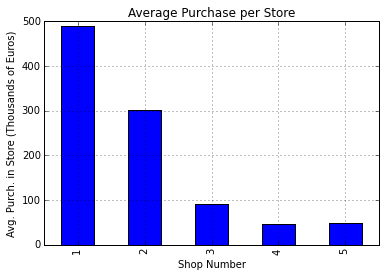

In [6]:
list_purchase = []
for k in range(1,6):
    text_ = 'avg_purchase_shop_' + str(k)
    aux_ = data[text_].sum()/1000.
    #print k , aux_
    list_purchase.append(aux_)
dfAux = pd.DataFrame()
dfAux['Store Number'] = [1,2,3,4,5]
dfAux['Avg. Purchase in Shop'] = list_purchase

dfAux.plot(x='Store Number',y='Avg. Purchase in Shop',kind='bar',
           title='Average Purchase per Store',legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Avg. Purch. in Store (Thousands of Euros)')
plt.show()

Now distribution of customers according to the number of shops they use when they purchase

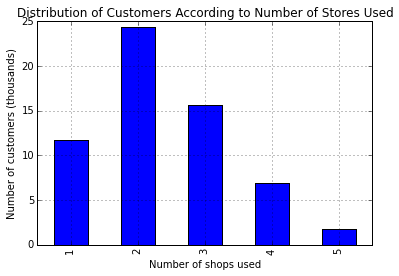

In [7]:
list_purchase = []
for k in range(1,6):
    #text_ = 'avg_purchase_shop_' + str(k)
    aux_ = sum(data['shops_used']== k)
    #perc_ = (float(aux_)/float(num_customers))*100
    perc_ = float(aux_/1000.)
    #print k , perc_
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Number of Shops Used'] = [1,2,3,4,5]
dfAux['Number of Customers'] = list_purchase

dfAux.plot(x='Number of Shops Used',y='Number of Customers',kind='bar',
           title='Distribution of Customers According to Number of Stores Used',
           legend=False,grid=True)
plt.xlabel('Number of shops used ')
plt.ylabel('Number of customers (thousands)')
plt.show()

Distribution of customers according to the shop number

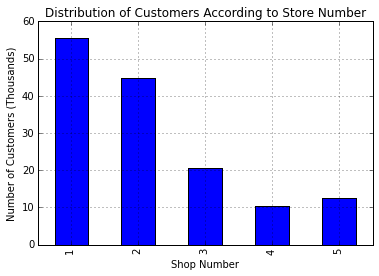

In [8]:
list_purchase = []
for k in range(1,6):
    text_ = 'avg_price_shop_' + str(k)
    aux_ = sum(data[text_] <> 0)
    #perc_ = aux_/float(num_customers)*100
    perc_ = float(sum(data[text_] <> 0)/1000.)
    #print k , perc_
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Number of Customers'] = list_purchase


dfAux.plot(x='Shop Number',y='Number of Customers',kind='bar',
           title='Distribution of Customers According to Store Number',
           legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of Customers (Thousands)')
plt.show()



In what follows we will add to our data frame two columns. One of them will indicate the number of store that is closest to customer and the otherone indicating what is the farthest. 

In [9]:
data[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5']].head()

,distance_shop_1,distance_shop_2,distance_shop_3,distance_shop_4,distance_shop_5
0,4082.5222,985.8762,2372.09700,4929.8047,3284.38670
1,1115.3433,2295.4840,670.90080,2048.0605,254.94832
2,1418.8348,2831.7727,1286.81900,1545.1963,754.29560
3,1104.3829,2210.3820,617.28710,2181.6853,362.79178
4,1913.7630,1375.1184,275.46753,2961.3035,1172.37730


In [10]:
dist_ = data[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5']].values

In [11]:
closest = []
farthest = []
for k in range(num_customers):
    Min = 1 + dist_[k,:].argmin()
    Max = 1 + dist_[k,:].argmax()
    closest.append(Min)
    farthest.append(Max)
data['closest_shop'] = closest
data['farthest_shop'] = farthest

In [12]:
data[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5','closest_shop',
      'farthest_shop']].head()

,distance_shop_1,distance_shop_2,distance_shop_3,distance_shop_4,distance_shop_5,closest_shop,farthest_shop
0,4082.5222,985.8762,2372.09700,4929.8047,3284.38670,2,4
1,1115.3433,2295.4840,670.90080,2048.0605,254.94832,5,2
2,1418.8348,2831.7727,1286.81900,1545.1963,754.29560,5,2
3,1104.3829,2210.3820,617.28710,2181.6853,362.79178,5,2
4,1913.7630,1375.1184,275.46753,2961.3035,1172.37730,3,4


We now see distribution of customers according to closeness to store

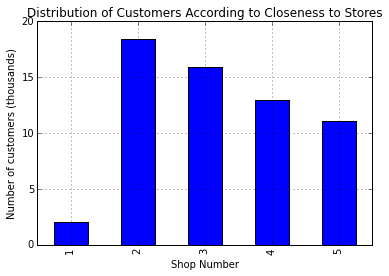

In [13]:
list_purchase = []
for k in range(1,6):
    aux_ = sum(data['closest_shop'] == k)
    #perc_ = aux_/float(num_customers)*100
    perc_ = float(aux_/1000.)
    #print k , perc_
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Customers Closest to Store'] = list_purchase


dfAux.plot(x='Shop Number',y='Customers Closest to Store',kind='bar',
           title='Distribution of Customers According to Closeness to Stores',
           legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of customers (thousands)')
plt.show()


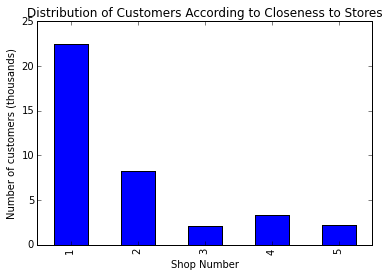

In [14]:
# PERCENTAGE OF CUSTOMER WHO PURCHASE AT A GIVEN STORE ARE IN FACT CLOSEST TO THAT STORE
# FOR CUSTOMERS WHO PURCHASE IN ONLY ONE STORE

list_purchase = []
rest = []
for k in range(1,6):
    df_aux = data[data['closest_shop'] == k][['amount_purchased_shop_'+str(k),'shops_used']]
    #aux_ = sum(data['closest_shop'] == k)
    aux_ = df_aux.shape[0]
    #aux2 = sum((data['closest_shop'] == k) & (data['amount_purchased_shop_'+str(k)] !=0 ) &
# (data['shops_used'] == 1)) 
    aux2 = sum((df_aux['amount_purchased_shop_'+str(k)] !=0 ) & (df_aux['shops_used'] == 1)) 
    #perc_ = aux_/float(num_customers)*100
    perc_ = float(aux2)*100/float(aux_)
    #print k , perc_
    list_purchase.append(perc_)
    rest.append(100. - perc_)
dfAux = pd.DataFrame()
#dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Customers Closest to Store'] = list_purchase
#dfAux['Customers Closest to another store'] = rest
dfAux.index = range(1,6)


#dfAux.plot(x='Shop Number',y='Customers Closest to Store',kind='bar',
#           title='Distribution of Customers According to Closeness to Stores',
#           legend=False,grid=True)
dfAux.plot(kind='bar',title='Distribution of Customers According to Closeness to Stores',
           legend=False) #,stacked=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of customers (thousands)')
plt.show()





In [15]:
dfAux

,Customers Closest to Store
1,22.463402
2,8.179448
3,2.124183
4,3.280961
5,2.166847


In [16]:
sum((data['closest_shop'] == 1) & (data['amount_purchased_shop_1'] !=0 ) &
 (data['shops_used'] == 1)) 

445

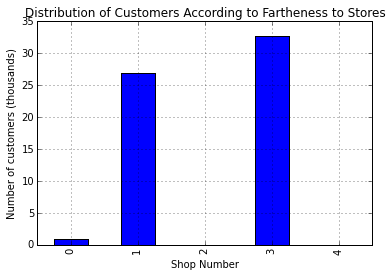

In [17]:
list_purchase = []
for k in range(1,6):
    aux_ = sum(data['farthest_shop'] == k)
    #perc_ = aux_/float(num_customers)*100
    perc_ = float(aux_/1000.)
    #print k , perc_
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
#dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Customers Farthest to Store'] = list_purchase


dfAux.plot(y='Customers Farthest to Store',kind='bar',
           title='Distribution of Customers According to Fartheness to Stores',
           legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of customers (thousands)')
plt.show()


Let's now get auxiliary data frames related with customers that purschased ONLY in each individual store

In [18]:
# Data frame for users who purchased ONLY in shop 1
df1 = data[(data.amount_purchased_shop_2 == 0.) & (data.amount_purchased_shop_3 == 0.) &
          (data.amount_purchased_shop_4 == 0.) & (data.amount_purchased_shop_5 == 0.)]
num_1 = df1.shape[0]
close11 = sum(df1.closest_shop == 1)
close12 = sum(df1.closest_shop == 2)
close13 = sum(df1.closest_shop == 3)
close14 = sum(df1.closest_shop == 4)
close15 = sum(df1.closest_shop == 5)


# Data frame for users who purchased ONLY in shop 2
df2 = data[(data.amount_purchased_shop_1 == 0.) & (data.amount_purchased_shop_3 == 0.) &
          (data.amount_purchased_shop_4 == 0.) & (data.amount_purchased_shop_5 == 0.)]
num_2 = df2.shape[0]
close21 = sum(df2.closest_shop == 1)
close22 = sum(df2.closest_shop == 2)
close23 = sum(df2.closest_shop == 3)
close24 = sum(df2.closest_shop == 4)
close25 = sum(df2.closest_shop == 5)


# Data frame for users who purchased ONLY in shop 3
df3 = data[(data.amount_purchased_shop_1 == 0.) & (data.amount_purchased_shop_2 == 0.) &
          (data.amount_purchased_shop_4 == 0.) & (data.amount_purchased_shop_5 == 0.)]
num_3 = df3.shape[0]
close31 = sum(df3.closest_shop == 1)
close32 = sum(df3.closest_shop == 2)
close33 = sum(df3.closest_shop == 3)
close34 = sum(df3.closest_shop == 4)
close35 = sum(df3.closest_shop == 5)


# Data frame for users who purchased ONLY in shop 4
df4 = data[(data.amount_purchased_shop_1 == 0.) & (data.amount_purchased_shop_2 == 0.) &
          (data.amount_purchased_shop_3 == 0.) & (data.amount_purchased_shop_5 == 0.)]
num_4 = df4.shape[0]
close41 = sum(df4.closest_shop == 1)
close42 = sum(df4.closest_shop == 2)
close43 = sum(df4.closest_shop == 3)
close44 = sum(df4.closest_shop == 4)
close45 = sum(df4.closest_shop == 5)


# Data frame for users who purchased ONLY in shop 5
df5 = data[(data.amount_purchased_shop_1 == 0.) & (data.amount_purchased_shop_2 == 0.) &
          (data.amount_purchased_shop_3 == 0.) & (data.amount_purchased_shop_4 == 0.)]
num_5 = df5.shape[0]
close51 = sum(df5.closest_shop == 1)
close52 = sum(df5.closest_shop == 2)
close53 = sum(df5.closest_shop == 3)
close54 = sum(df5.closest_shop == 4)
close55 = sum(df5.closest_shop == 5)



We check consistency with our initial data frame

In [19]:
print num_1 + num_2 + num_3 + num_4 + num_5
print sum(data.shops_used == 1)

11710
11710


Let's see distribution of customers who purchased ONLY in one store and how many of them where closest to THAT particular store

In [20]:
#del df_close
one_store = [num_1,num_2,num_3,num_4,num_5]
closest_to_1 = [close11,close21,close31,close41,close51]
closest_to_2 = [close12,close22,close32,close42,close52]
closest_to_3 = [close13,close23,close33,close43,close53]
closest_to_4 = [close14,close24,close34,close44,close54]
closest_to_5 = [close15,close25,close35,close45,close55]

df_close = pd.DataFrame()
df_close['Total customers'] = one_store
df_close['Closest to 1'] = closest_to_1
df_close['Closest to 2'] = closest_to_2
df_close['Closest to 3'] = closest_to_3
df_close['Closest to 4'] = closest_to_4
df_close['Closest to 5'] = closest_to_5
df_close.index = range(1,6)


In [21]:
df_close

,Total customers,Closest to 1,Closest to 2,Closest to 3,Closest to 4,Closest to 5
1,7987,445,1019,1557,3112,1854
2,2470,18,1506,519,196,231
3,449,10,18,338,36,47
4,478,4,9,19,426,20
5,326,24,16,19,27,240


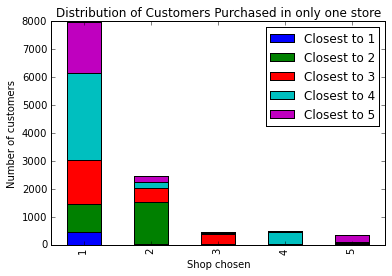

In [22]:
df_stack = df_close[['Closest to 1','Closest to 2','Closest to 3',
                     'Closest to 4','Closest to 5']]
df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in only one store',stacked=True)
plt.xlabel('Shop chosen')
plt.ylabel('Number of customers')
plt.show()

In [23]:
# Data frame for users who purchased in only ONE shop
df1 = data[(data.amount_purchased_shop_1 != 0.) & (data.shops_used == 1)]
num_1 = df1.shape[0]
close11 = sum(df1.closest_shop == 1)
close12 = sum(df1.closest_shop == 2)
close13 = sum(df1.closest_shop == 3)
close14 = sum(df1.closest_shop == 4)
close15 = sum(df1.closest_shop == 5)


# Data frame for users who purchased ONLY in shop 2
df2 = data[(data.amount_purchased_shop_2 != 0.) & (data.shops_used == 1)]
num_2 = df2.shape[0]
close21 = sum(df2.closest_shop == 1)
close22 = sum(df2.closest_shop == 2)
close23 = sum(df2.closest_shop == 3)
close24 = sum(df2.closest_shop == 4)
close25 = sum(df2.closest_shop == 5)


# Data frame for users who purchased ONLY in shop 3
df3 = data[(data.amount_purchased_shop_3 != 0.) & (data.shops_used == 1)]
num_3 = df3.shape[0]
close31 = sum(df3.closest_shop == 1)
close32 = sum(df3.closest_shop == 2)
close33 = sum(df3.closest_shop == 3)
close34 = sum(df3.closest_shop == 4)
close35 = sum(df3.closest_shop == 5)


# Data frame for users who purchased ONLY in shop 4
df4 = data[(data.amount_purchased_shop_4 != 0.) & (data.shops_used == 1)]
num_4 = df4.shape[0]
close41 = sum(df4.closest_shop == 1)
close42 = sum(df4.closest_shop == 2)
close43 = sum(df4.closest_shop == 3)
close44 = sum(df4.closest_shop == 4)
close45 = sum(df4.closest_shop == 5)


# Data frame for users who purchased ONLY in shop 5
df5 = data[(data.amount_purchased_shop_5 != 0.) & (data.shops_used == 1)]
num_5 = df5.shape[0]
close51 = sum(df5.closest_shop == 1)
close52 = sum(df5.closest_shop == 2)
close53 = sum(df5.closest_shop == 3)
close54 = sum(df5.closest_shop == 4)
close55 = sum(df5.closest_shop == 5)



In [24]:
print num_1 + num_2 + num_3 + num_4 + num_5
print sum(data.shops_used == 1)

11710
11710


In [25]:
del df_close
one_store = [num_1,num_2,num_3,num_4,num_5]
closest_to_1 = [close11,close21,close31,close41,close51]
closest_to_2 = [close12,close22,close32,close42,close52]
closest_to_3 = [close13,close23,close33,close43,close53]
closest_to_4 = [close14,close24,close34,close44,close54]
closest_to_5 = [close15,close25,close35,close45,close55]

df_close = pd.DataFrame()
df_close['Total customers'] = one_store
df_close['Closest to 1'] = closest_to_1
df_close['Closest to 2'] = closest_to_2
df_close['Closest to 3'] = closest_to_3
df_close['Closest to 4'] = closest_to_4
df_close['Closest to 5'] = closest_to_5
df_close.index = range(1,6)


In [26]:
df_close

,Total customers,Closest to 1,Closest to 2,Closest to 3,Closest to 4,Closest to 5
1,7987,445,1019,1557,3112,1854
2,2470,18,1506,519,196,231
3,449,10,18,338,36,47
4,478,4,9,19,426,20
5,326,24,16,19,27,240


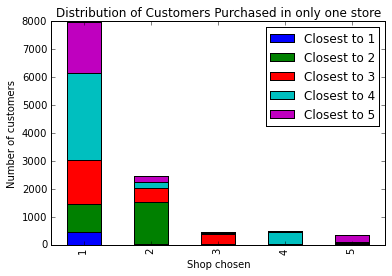

In [27]:
df_stack = df_close[['Closest to 1','Closest to 2','Closest to 3',
                     'Closest to 4','Closest to 5']]
df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in only one store',stacked=True)
plt.xlabel('Shop chosen')
plt.ylabel('Number of customers')
plt.show()

In [28]:
# Data frame for users who purchased in only TWO shops
df_1_and_2 = data[(data.amount_purchased_shop_1 != 0.) &
                        (data.amount_purchased_shop_2 != 0.) & (data.shops_used == 2)]

pair_12 = df_1_and_2.shape[0]


df_1_and_3 = data[(data.amount_purchased_shop_1 != 0.) &
                        (data.amount_purchased_shop_3 != 0.) & (data.shops_used == 2)]

pair_13 = df_1_and_3.shape[0]

df_1_and_4 = data[(data.amount_purchased_shop_1 != 0.) &
                        (data.amount_purchased_shop_4 != 0.) & (data.shops_used == 2)]

pair_14 = df_1_and_4.shape[0]

df_1_and_5 = data[(data.amount_purchased_shop_1 != 0.) &
                        (data.amount_purchased_shop_5 != 0.) & (data.shops_used == 2)]

pair_15 = df_1_and_5.shape[0]

df_2_and_3 = data[(data.amount_purchased_shop_2 != 0.) &
                        (data.amount_purchased_shop_3 != 0.) & (data.shops_used == 2)]

pair_23 = df_2_and_3.shape[0]

df_2_and_4 = data[(data.amount_purchased_shop_2 != 0.) &
                        (data.amount_purchased_shop_4 != 0.) & (data.shops_used == 2)]

pair_24 = df_2_and_4.shape[0]

df_2_and_5 = data[(data.amount_purchased_shop_2 != 0.) &
                        (data.amount_purchased_shop_5 != 0.) & (data.shops_used == 2)]

pair_25 = df_2_and_5.shape[0]

df_3_and_4 = data[(data.amount_purchased_shop_3 != 0.) &
                        (data.amount_purchased_shop_4 != 0.) & (data.shops_used == 2)]

pair_34 = df_3_and_4.shape[0]

df_3_and_5 = data[(data.amount_purchased_shop_3 != 0.) &
                        (data.amount_purchased_shop_5 != 0.) & (data.shops_used == 2)]

pair_35 = df_3_and_5.shape[0]

df_4_and_5 = data[(data.amount_purchased_shop_4 != 0.) &
                        (data.amount_purchased_shop_5 != 0.) & (data.shops_used == 2)]

pair_45 = df_4_and_5.shape[0]


In [29]:
print pair_12, num_1, num_2
print pair_13, num_1, num_3
print pair_14, num_1, num_4
print pair_15, num_1, num_5
print "==="*8
print pair_23, num_2, num_3
print pair_24, num_2, num_4
print pair_25, num_2, num_5
print "==="*8
print pair_34, num_3, num_4
print pair_35, num_3, num_5
print "==="*8
print pair_45, num_4, num_5

18819 7987 2470
1639 7987 449
1806 7987 478
1198 7987 326
414 2470 449
178 2470 478
140 2470 326
34 449 478
101 449 326
33 478 326


In [30]:
print sum(df_1_and_2.closest_shop == 1)
print sum(df_1_and_2.closest_shop == 2)
print sum(df_1_and_2.closest_shop == 3)

343
9785
4215


In [31]:
data[['amount_purchased','amount_purchased_shop_1','amount_purchased_shop_2',
     'amount_purchased_shop_3','amount_purchased_shop_4','amount_purchased_shop_5']].head()

,amount_purchased,amount_purchased_shop_1,amount_purchased_shop_2,amount_purchased_shop_3,amount_purchased_shop_4,amount_purchased_shop_5
0,7551.701,803.968,6747.733,0.000,0,0.000
1,7820.219,395.004,848.526,50.932,0,6525.757
2,1788.613,120.226,582.939,25.004,0,1060.444
3,1679.520,99.948,13.442,628.648,0,937.482
4,17.922,0.000,2.903,15.019,0,0.000


In [32]:
data[['unique_products_purchased','unique_products_purchased_shop_1',
      'unique_products_purchased_shop_2','unique_products_purchased_shop_3',
      'unique_products_purchased_shop_4','unique_products_purchased_shop_5']].head()

,unique_products_purchased,unique_products_purchased_shop_1,unique_products_purchased_shop_2,unique_products_purchased_shop_3,unique_products_purchased_shop_4,unique_products_purchased_shop_5
0,473,77,454,0,0,0
1,486,105,175,20,0,396
2,234,32,104,13,0,179
3,208,20,5,125,0,131
4,10,0,3,7,0,0


In [33]:
print max(data[(data.shops_used == 1) & (data.amount_purchased_shop_1 != 0.)]
          ['unique_products_purchased_shop_1'].values)
print max(data[(data.shops_used == 1) & (data.amount_purchased_shop_2 != 0.)]
          ['unique_products_purchased_shop_2'].values)
print max(data[(data.shops_used == 1) & (data.amount_purchased_shop_3 != 0.)]
          ['unique_products_purchased_shop_3'].values)
print max(data[(data.shops_used == 1) & (data.amount_purchased_shop_4 != 0.)]
          ['unique_products_purchased_shop_4'].values)
print max(data[(data.shops_used == 1) & (data.amount_purchased_shop_5 != 0.)]
          ['unique_products_purchased_shop_5'].values)

1229
899
739
725
572


In [34]:
print max(data[(data.shops_used == 2) & (data.amount_purchased_shop_1 != 0.)]
          ['unique_products_purchased_shop_1'].values)
print max(data[(data.shops_used == 2) & (data.amount_purchased_shop_2 != 0.)]
          ['unique_products_purchased_shop_2'].values)
print max(data[(data.shops_used == 2) & (data.amount_purchased_shop_3 != 0.)]
          ['unique_products_purchased_shop_3'].values)
print max(data[(data.shops_used == 2) & (data.amount_purchased_shop_4 != 0.)]
          ['unique_products_purchased_shop_4'].values)
print max(data[(data.shops_used == 2) & (data.amount_purchased_shop_5 != 0.)]
          ['unique_products_purchased_shop_5'].values)

1459
1161
715
723
750


In [35]:
print max(data[(data.shops_used == 3) & (data.amount_purchased_shop_1 != 0.)]
          ['unique_products_purchased_shop_1'].values)
print max(data[(data.shops_used == 3) & (data.amount_purchased_shop_2 != 0.)]
          ['unique_products_purchased_shop_2'].values)
print max(data[(data.shops_used == 3) & (data.amount_purchased_shop_3 != 0.)]
          ['unique_products_purchased_shop_3'].values)
print max(data[(data.shops_used == 3) & (data.amount_purchased_shop_4 != 0.)]
          ['unique_products_purchased_shop_4'].values)
print max(data[(data.shops_used == 3) & (data.amount_purchased_shop_5 != 0.)]
          ['unique_products_purchased_shop_5'].values)

1245
1053
836
785
801


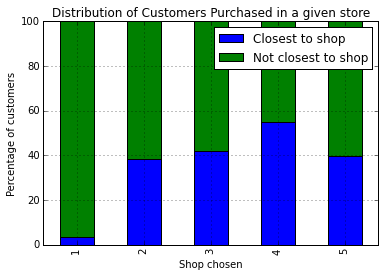

In [86]:
# PERCENTAGE OF ALL PEOPLE WHO PURCHASE AT A GIVEN SHOP AND ARE CLOSEST TO SUCH STORE

listA = []
listB = []
df_stack = pd.DataFrame()
text_ = 'amount_purchased_shop_'
for k in range(1,6):
    
    a = sum((data[text_ + str(k)] != 0.)) 
   
    b = sum((data.closest_shop == k) & (data[text_ + str(k)] != 0.))
    
    listA.append((1. - float(b)/float(a))*100.)
    listB.append(float(b)/float(a)*100.)

    #print b, a, 100.*float(b)/float(a)
    
    #print "====="*8


df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in a given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()



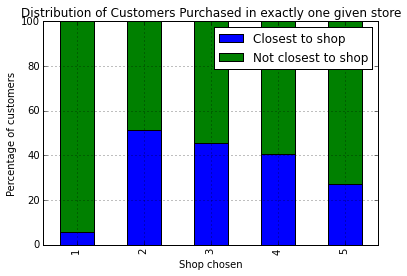

In [85]:
# PERCENTAGE OF ALL PEOPLE WHO PURCHASE AT ONLY ONE GIVEN SHOP AND ARE CLOSEST TO SUCH STORE

listA = []
listB = []
df_stack = pd.DataFrame()

text_ = 'amount_purchased_shop_'

for k in range(1,6):
    
    a =  sum((data[text_ + str(k)] != 0.) &
          (data.shops_used == k))
    
    b = sum((data.closest_shop == k) & (data[text_ + str(k)] != 0.) &
          (data.shops_used == k))

    listA.append((1. - float(b)/float(a))*100.)
    listB.append(float(b)/float(a)*100.)

    #print "====="*8

df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in exactly one given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()

    


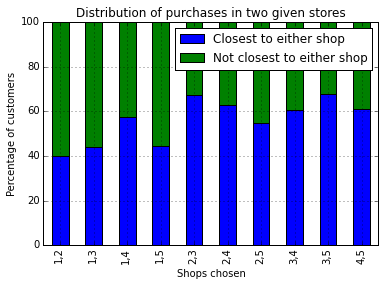

In [89]:
text_ = "amount_purchased_shop_"

listA = []
listB = []
df_stack = pd.DataFrame()
labels_ = []


for m in range(1,6):
    for n in range(m+1,6):
        
        #print "stores" , m,n
        
        labels_.append(str(m) + "," + str(n))
        
        a =  sum((data[text_ + str(m)] != 0.) & (data[text_ + str(n)] != 0.))


        b = sum((data[text_ + str(m)] != 0.) & (data[text_ + str(n)] != 0.) &
          ((data.closest_shop == m) | (data.closest_shop == n)))

        listA.append((1. - float(b)/float(a))*100.)
        listB.append(float(b)/float(a)*100.)
        
        #print b, a, 100.*float(b)/float(a)

        #print "====="*8
        
df_stack['Closest to either shop'] = listB
df_stack['Not closest to either shop'] = listA
df_stack.index = labels_ #range(1,6)

df_stack.plot(kind='bar',
           title='Distribution of purchases in two given stores',stacked=True,
              grid=True)
plt.xlabel('Shops chosen')
plt.ylabel('Percentage of customers')
plt.show()

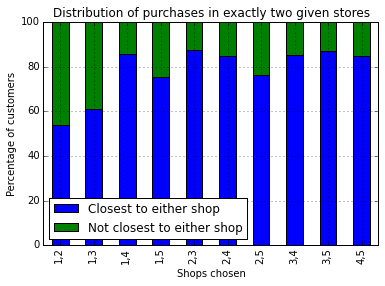

In [90]:
text_ = "amount_purchased_shop_"

listA = []
listB = []
df_stack = pd.DataFrame()
labels_ = []


for m in range(1,6):
    for n in range(m+1,6):
        
        #print "stores" , m,n
        
        labels_.append(str(m) + "," + str(n))
        
        a =  sum((data[text_ + str(m)] != 0.) & (data[text_ + str(n)] != 0.) &
          (data.shops_used == 2))


        b = sum((data[text_ + str(m)] != 0.) & (data[text_ + str(n)] != 0.) &
          (data.shops_used == 2) &
          ((data.closest_shop == m) | (data.closest_shop == n)))

        listA.append((1. - float(b)/float(a))*100.)
        listB.append(float(b)/float(a)*100.)
        
        #print b, a, 100.*float(b)/float(a)

        #print "====="*8
        
df_stack['Closest to either shop'] = listB
df_stack['Not closest to either shop'] = listA
df_stack.index = labels_ #range(1,6)

df_stack.plot(kind='bar',
           title='Distribution of purchases in exactly two given stores',stacked=True,
              grid=True)
plt.xlabel('Shops chosen')
plt.ylabel('Percentage of customers')
plt.show()

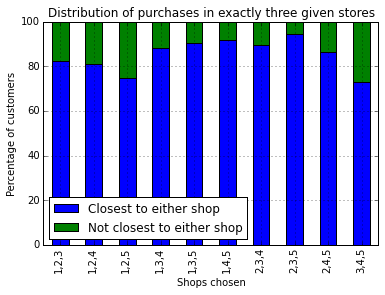

In [94]:
text_ = "amount_purchased_shop_"

listA = []
listB = []
df_stack = pd.DataFrame()
labels_ = []


for i in range(1,6):
    for j in range(i+1,6):
        for k in range(j+1,6):
            #print "stores" , i,j,k
            
            labels_.append(str(i) + "," + str(j) + "," + str(k))
        
            a =  sum((data[text_ + str(i)] != 0.) & (data[text_ + str(j)] != 0.) &
                     (data[text_ + str(k)] != 0.) & (data.shops_used == 3))


            b = sum((data[text_ + str(i)] != 0.) & (data[text_ + str(j)] != 0.) &
                    (data[text_ + str(k)] != 0.) &
                    (data.shops_used == 3) &
                    ((data.closest_shop == i) | (data.closest_shop == j) |
                     (data.closest_shop == k) ))

            listA.append((1. - float(b)/float(a))*100.)
            listB.append(float(b)/float(a)*100.)
        
        #print b, a, 100.*float(b)/float(a)

        #print "====="*8
        
df_stack['Closest to either shop'] = listB
df_stack['Not closest to either shop'] = listA
df_stack.index = labels_ #range(1,6)

df_stack.plot(kind='bar',
           title='Distribution of purchases in exactly three given stores',stacked=True,
              grid=True)
plt.xlabel('Shops chosen')
plt.ylabel('Percentage of customers')
plt.show()
        

In [101]:
data[(data.shops_used == 1)][['unique_products_purchased_shop_1',
                              'unique_products_purchased_shop_2',
                              'unique_products_purchased_shop_3',
                              'unique_products_purchased_shop_4',
                              'unique_products_purchased_shop_5']].head()

,unique_products_purchased_shop_1,unique_products_purchased_shop_2,unique_products_purchased_shop_3,unique_products_purchased_shop_4,unique_products_purchased_shop_5
6,19,0,0,0,0
13,55,0,0,0,0
16,14,0,0,0,0
23,48,0,0,0,0
24,0,54,0,0,0


In [117]:
print data[(data.shops_used == 1) & (data.amount_purchased_shop_1 !=0)]['unique_products_purchased'].max()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_2 !=0)]['unique_products_purchased'].max()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_3 !=0)]['unique_products_purchased'].max()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_4 !=0)]['unique_products_purchased'].max()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_5 !=0)]['unique_products_purchased'].max()

1229.0
899.0
739.0
725.0
572.0


In [118]:
print data[(data.shops_used == 1) & (data.amount_purchased_shop_1 !=0)]['unique_products_purchased'].min()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_2 !=0)]['unique_products_purchased'].min()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_3 !=0)]['unique_products_purchased'].min()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_4 !=0)]['unique_products_purchased'].min()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_5 !=0)]['unique_products_purchased'].min()

1.0
1.0
1.0
1.0
1.0


In [104]:
print sum((data.shops_used == 1) & (data.amount_purchased_shop_1 !=0))
print sum((data.shops_used == 1) & (data.amount_purchased_shop_2 !=0))
print sum((data.shops_used == 1) & (data.amount_purchased_shop_3 !=0))
print sum((data.shops_used == 1) & (data.amount_purchased_shop_4 !=0))
print sum((data.shops_used == 1) & (data.amount_purchased_shop_5 !=0))

7987
2470
449
478
326


In [40]:
quartiles = np.percentile(data.amount_purchased.values,np.arange(0,100,25))
quartiles

array([  2.12000000e-01,   6.53107000e+02,   2.35513800e+03,
         6.05463100e+03])

In [44]:
text_ = 'amount_purchased_shop_1'
print sum((data[text_] != 0.))

55552
